In [40]:
import sys
import tensorflow as tf
import numpy as np
from PIL import Image
from object_detection import ObjectDetection
import mscviplib

MODEL_FILENAME = 'model.pb'
LABELS_FILENAME = 'labels.txt'


class TFObjectDetection(ObjectDetection):
    """Object Detection class for TensorFlow"""

    def __init__(self, graph_def, labels):
        super(TFObjectDetection, self).__init__(labels)
        self.graph = tf.Graph()
        with self.graph.as_default():
            input_data = tf.placeholder(tf.float32, [1, None, None, 3], name='Placeholder')
            tf.import_graph_def(graph_def, input_map={"Placeholder:0": input_data}, name="")

    def predict(self, preprocessed_image):
        inputs = np.array(preprocessed_image, dtype=np.float)[:, :, (2, 1, 0)]  # RGB -> BGR

        with tf.Session(graph=self.graph) as sess:
            output_tensor = sess.graph.get_tensor_by_name('model_outputs:0')
            outputs = sess.run(output_tensor, {'Placeholder:0': inputs[np.newaxis, ...]})
            return outputs[0]


def main(image_filename):
    # Load a TensorFlow model
    graph_def = tf.GraphDef()
    with tf.gfile.FastGFile(MODEL_FILENAME, 'rb') as f:
        graph_def.ParseFromString(f.read())

    # Load labels
    with open(LABELS_FILENAME, 'r') as f:
        labels = [l.strip() for l in f.readlines()]

    od_model = TFObjectDetection(graph_def, labels)

   # image = Image.open(image_filename)
    predictions = od_model.predict_image(image_filename)
    return predictions
    




        img=cv2.drawKeypoints(frame,keypoints,np.array([]),(0,255,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
   
  
        m_tracker=cv2.MultiTracker_create()
    
        #Adding trackers to Multitracker
        avg_size=[]
        for i in range(len(keypoints)):
            #print(keypoints[i].pt[0],keypoints[i].pt[1])
            avg_size.append(keypoints[i].size)
            roi=(keypoints[i].pt[0]-10,keypoints[i].pt[1]-10,30,30)
            m_tracker.add(self.ask_tracker(),frame,roi)
        avg_size=np.asarray(avg_size)
    #    print(avg_size.mean())
        #if avg_size.mean()<20:
        #    brightnessThreshold=1.5
        #    params.maxArea=1000
        #    params.minArea=41
        #elif avg_size.mean()<15:
        #    brightnessThreshold=2
        #    params.maxArea=1000
        #    params.minArea=41
        #elif avg_size.mean()>20:
        #    brightnessThreshold=1.7
        #    params.filterByCircularity=True
        #    params.minCircularity = 0.85
        #    params.maxArea=3000
        #    params.minArea=120
        #    print('8 Inch')
        ###################################################################################
                                      #REAL DETECTION#
        ################################################################################## 
        ret,frame=cap.read()
    
    
        #Detecting Blobs
    
   
        #frame=cv2.addWeighted(frame,brightnessThreshold, np.zeros(frame.shape, frame.dtype), -1, 0.5)
    
      #  frame=cv2.resize(frame,(1024,768))
      #  frame=cv2.rotate(frame,cv2.ROTATE_180)
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #    kernel=np.ones((2,2),np.uint8)
    #    gray=cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel)
        keypoints=detector.detect(gray)
    
        img=cv2.drawKeypoints(frame,keypoints,np.array([]),(0,255,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    
        m_tracker=cv2.MultiTracker_create()
    
        #Adding trackers to Multitracker
        avg_size=[]
        for i in range(len(keypoints)):
            #print(keypoints[i].pt[0],keypoints[i].pt[1])
            avg_size.append(keypoints[i].size)
            roi=(keypoints[i].pt[0]-10,keypoints[i].pt[1]-10,30,30)
            m_tracker.add(self.ask_tracker(),frame,roi)

        
        print ('Second detection done')

        ###################################################################################
                                    #DETECTION ON VIDEO#
        ################################################################################## 
        
        
        
        # Tracking the objects on video
        total_count=0
        count=0
        obj_count=0


        while ret:
            minute=dt.datetime.now().minute
            second=dt.datetime.now().second
            hour=dt.datetime.now().hour

         ###################################################################################
                                    #SQL Update#
        ################################################################################## 
        
            
            if minute==59 and second>55 and flag==0:
            
              
                query='INSERT INTO [IN_Digitalization].[dbo].[FD_Furnace] ( Input,PartCode,t_stamp) VALUES ('+str(total_count)+",'"+str(partCode)+"',GETDATE())"
                cursor.execute(query)
                conn.commit()
                flag=1
            if minute==0 and flag==1:
                flag=0


         ###################################################################################
                                    #Video Detection#
        ################################################################################## 

            ret,frame=cap.read()
            
            if ret:
                count+=1
                frame=cv2.addWeighted(frame,brightnessThreshold, np.zeros(frame.shape, frame.dtype), -1, 0.5)
             #   frame=cv2.resize(frame,(1024,768))
             #   frame=cv2.rotate(frame,cv2.ROTATE_180)
                recordFrame=frame.copy()
                x1=0
                x2=frame.shape[0]-120
                y1=frame.shape[1]
                y2=frame.shape[0]-120
                cv2.line(frame,(x1,x2),(y1,y2),(0,255,0),2)

                (retb,boxes)=m_tracker.update(frame)
          
                for box in boxes:
                    (x, y, w, h) = [int(v) for v in box]
                    if (y+h<x2) & (y+h>80) :

                        cv2.rectangle(frame, (x, y), (x + 20, y + 20), (0, 255, 0), 2)
                        #frame=cv2.putText(frame,str(y+h),(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv2.LINE_8)
                    else:
                        obj_count+=1
    
                #TOTAL IS THE NUMBER OF OBJECTS IN CURRENT FRAME
                
                remaining=len(boxes)-obj_count
                
        
           
                if int(remaining)<5:
                    remainingCount+=1
                    if remainingCount%10==0:

                        numberCrossed=0
                        print(len(boxes))
                        for box in boxes:
                            (x, y, w, h) = [int(v) for v in box]
                       
                            if (y+h>x2) & (y+h<80):

                                ## Hiding the already detected objects
                                frame=cv2.rectangle(frame, (x, y), (x + w+8, y + h+8), (0, 255,0), -1)
                            
                            else:
                                numberCrossed+=1
                        frame=cv2.rectangle(frame,(0,frame.shape[0]),(frame.shape[1],frame.shape[1]),(0,255,0),-1) 
                    
    ##                       
    #                    if len(boxes)==0:
    #                        new_frame=frame
                        
                        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                        keypoints=detector.detect(gray)


                        # Create new tracking if more than 5 parts are detected
                        if len(keypoints)>10:
                            remainingCount=0
                            #print('inside')
                            #m_tracker.release()
                            m_tracker=cv2.MultiTracker_create()
                            avg_size=[]
                        
                            for i in range(len(keypoints)):
        #                        print('Test',keypoints[i].size)
                                #print(keypoints[i].pt[0],keypoints[i].pt[1])
                                roi=(keypoints[i].pt[0]-10,keypoints[i].pt[1]-10,30,30)
                                avg_size.append(keypoints[i].size)
                                m_tracker.add(self.ask_tracker(),frame,roi)
                            #print(len(keypoints),' Keypoints')  
                            avg_size=np.asarray(avg_size)
                            #print(avg_size.mean())
                            #if avg_size.mean()<20:
                            #    brightnessThreshold=1.5
                            #    params.maxArea=1000
                            #    params.minArea=41
                            #elif avg_size.mean()<15:
                            #    brightnessThreshold=2
                            #    params.maxArea=1000
                            #    params.minArea=41
                            #elif avg_size.mean()>20:
                            #    brightnessThreshold=1.7
                            #    params.filterByCircularity=True
                            #    params.minCircularity = 0.85
                            #    params.maxArea=3000
                            #    params.minArea=120
                            #    print('8 inch')
                        
                            total_count=total_count+(len(boxes)-remaining)
                obj_count=0
                frame=cv2.putText(frame,'In Frame:'+str(remaining),(0,20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3,cv2.LINE_8)
                #frame=cv2.putText(frame,'Total:'+str(total_count+len(boxes)-remaining),(0,60),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),5,cv2.LINE_8)
                #print(total_count,len(boxes),remaining,total_count+len(boxes)-remaining)
                self.lcdNumber_2.display(total_count+len(boxes)-remaining)
                self.viewCam(frame)
                
                                  
                if (recordStatus==1) & recordFlag:
                    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
                    ext=str(dt.datetime.now().minute)+str(dt.datetime.now().second)
                    out = cv2.VideoWriter('output'+ext+'.mp4', fourcc, 20.0, (1024,768))
                    recordFlag=False
                    print('Initialized')
                elif (recordStatus==1) & (not recordFlag):
                  #  recordFrame=cv2.resize(recordFrame,(1024,768))  
                    out.write(recordFrame)
                    print('Recording')
                elif (recordStatus==0) & (not recordFlag):
                    out.release()
                    recordFlag=True
                    print('Stopped')
                   
                #cv2.imshow('Video',frame)

            if cv2.waitKey(1)==ord('q'):
                break
            if stopExecution==1:
                stopExecution=0
                break
           

        cv2.destroyAllWindows()


In [76]:
import datetime as dt
import cv2
brightnessThreshold=0.9
import time

def realtime_capture():
        videoFile='cuconn.mp4'
 

        ################################################Reading first frame of video ##########################################
        #cap=cv2.VideoCapture(0)
        cap=cv2.VideoCapture(videoFile)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
        cap.set(cv2.CAP_PROP_FPS,120)
        remainingCount=0
    

    
        ###################################################################################
                                      #TEST DETECTION#
        ##################################################################################                            
        #Reading first frame
        ret,frame=cap.read()
    
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        brightness=hsv[2].mean()
        print('Old',brightness)
        if brightness< 90:
            frame=cv2.addWeighted(frame,brightnessThreshold, np.zeros(frame.shape, frame.dtype), -1, 0.5)
         
        hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        brightness=hsv[2].mean()
        print('New',brightness)
        #Detecting Blobs
        
   
        frame=cv2.addWeighted(frame,brightnessThreshold, np.zeros(frame.shape, frame.dtype), -1, 0.5)
        frameforPrediction=Image.fromarray(frame)
        start=time.time()
        keypoints=main(frameforPrediction)
        print(time.time()-start)
        
        for i in range(len(keypoints)):
            x=int(keypoints[i]['boundingBox']['left']*1024)
            y=int(keypoints[i]['boundingBox']['top']*768)
            h=int(keypoints[i]['boundingBox']['height']*768)
            w=int(keypoints[i]['boundingBox']['width']*1024)
            if keypoints[i]['probability']>0.51:
                frame=cv2.rectangle(frame,(int(x+(w/2)-40),int(y+(h/2)-40)),(int(x+(w-50)),int(y+(h-50))),(0,255,0),3,lineType=1)
        plt.imshow(frame)
        m_tracker=cv2.MultiTracker_create()

        #Adding trackers to Multitracker
        start=time.time()
        for i in range(len(keypoints)):
            #print(keypoints[i].pt[0],keypoints[i].pt[1])
            roi=(keypoints[i].pt[0]-10,keypoints[i].pt[1]-10,30,30)
            m_tracker.add(self.ask_tracker(),frame,roi)
        print(time.time()-start)

Old 0.0
New 0.0
3.2334868907928467


AttributeError: 'dict' object has no attribute 'pt'

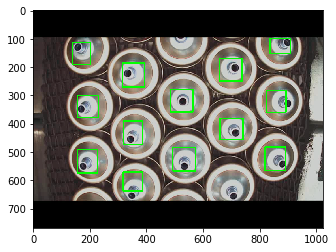

In [77]:
import matplotlib.pyplot as plt
realtime_capture()


In [69]:
im

In [34]:
from PIL import Image
img=cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image=Image.fromarray(img)

In [35]:
image.show()

In [29]:
import os 
os.chdir('C:\\Users\\U335153\\Desktop\\AI')